## In this notebook we will further investigate the data by trying to fit a regression model. 

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import torch
from sklearn.model_selection import RandomizedSearchCV

In [2]:
bike = pd.read_csv('bike_features_final.csv')

/Users/user/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
bike.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'end_time', 'ride_length', 'start_date1',
       'week_day', 'ride_length_seconds', 'Time_diff', 'with_friend',
       'ride_type', 'weekend_weekday', 'time_only', 'hour', 'time_of_day',
       'Dist', 'ride_length_hours', 'speed_kmh'],
      dtype='object')

In [3]:
variables= ["member_casual","weekend_weekday","ride_length_seconds","with_friend","ride_type","time_of_day","speed_kmh"]

In [4]:
bike_vars = bike[variables]

In [6]:
bike_vars.head()

,member_casual,weekend_weekday,ride_length_seconds,with_friend,ride_type,time_of_day,speed_kmh
0,casual,0,1353.0,0.0,medium,night,8.100618
1,member,0,490.0,0.0,medium,night,8.496430
2,casual,0,1299.0,0.0,medium,night,9.312414
3,member,0,437.0,0.0,short,night,12.166643
4,member,0,323.0,1.0,short,night,12.123315


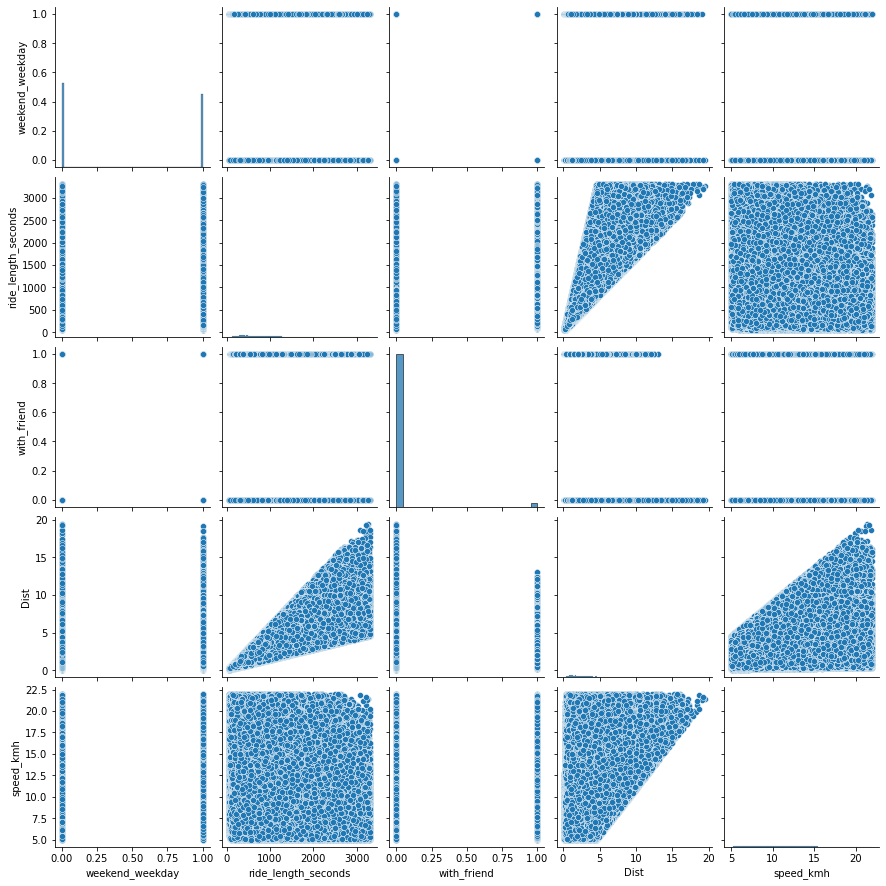

In [13]:
sns.pairplot(bike_vars)

In [7]:
y = bike.Dist

In [8]:
x_train, x_test, y_train, y_test = train_test_split(bike_vars, y, test_size=0.3,random_state=1)

In [9]:
x_train=pd.get_dummies(x_train, drop_first=True)

In [10]:
x_test=pd.get_dummies(x_test, drop_first=True)

In [37]:
x_train.head()

,weekend_weekday,ride_length_seconds,with_friend,speed_kmh,member_casual_member,ride_type_medium,ride_type_short,time_of_day_morning,time_of_day_night
1201537,1,1677.0,0.0,7.730194,0,0,0,0,1
1766255,1,678.0,0.0,10.811018,1,1,0,0,1
149261,1,1350.0,0.0,11.845584,1,1,0,0,1
2365546,1,144.0,0.0,7.490442,1,0,1,0,0
2221486,0,1381.0,0.0,13.520738,1,1,0,0,1


In [10]:
reg = linear_model.LinearRegression()

In [38]:
reg.fit(x_train, y_train)

LinearRegression()

In [39]:
print('Variance score: {}'.format(reg.score(x_test, y_test)))

Variance score: 0.9220073503508682


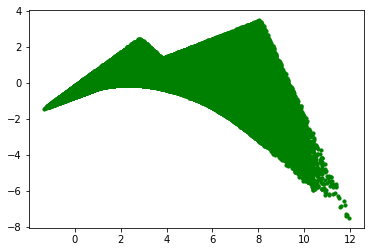

In [40]:
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train,
			color = "green", s = 10, label = 'Train data')

### Residuals look terrible, lets try to investigate 

In [41]:
results = sm.OLS(y_train,x_train).fit()

In [42]:
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Dist   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                          5.671e+06
Date:                Sun, 26 Jun 2022   Prob (F-statistic):                        0.00
Time:                        14:58:37   Log-Likelihood:                     -1.6224e+06
No. Observations:             1811507   AIC:                                  3.245e+06
Df Residuals:                 1811498   BIC:                                  3.245e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
weekend_weekday         -0.1145      0.001   -128.917      0.000      -0.116      -0.113
ride_length_seconds      0.0019   8.68e-07   2174.066      0.000       0.002       0.002
with_friend             -0.1163      0.003    -43.178      0.000      -0.122      -0.111
speed_kmh                0.2055      0.000   1586.951      0.000       0.205       0.206
member_casual_member    -0.0360      0.001    -37.539      0.000      -0.038      -0.034
ride_type_medium        -1.1610      0.001   -947.897      0.000      -1.163      -1.159
ride_type_short         -1.8464      0.002  -1112.872      0.000      -1.850      -1.843
time_of_day_morning     -0.0510      0.001    -43.010      0.000      -0.053      -0.049
time_of_day_night       -0.0987      0.001    -99.029      0.000      -0.101      -0.097
==============================================================================
Omnibus:                   451399.118   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4830854.983
Skew:                           0.895   Prob(JB):                         0.00
Kurtosis:                      10.797   Cond. No.                     6.47e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Looking at variance inflation factor (VIF) is one of the ways to identify multicollinearity

In [43]:
vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]

In [44]:
vif_data

,feature,VIF
0,weekend_weekday,1.900443
1,ride_length_seconds,4.337018
2,with_friend,1.039558
3,speed_kmh,11.382158
4,member_casual_member,3.221188
5,ride_type_medium,4.197751
6,ride_type_short,3.979308
7,time_of_day_morning,1.634102
8,time_of_day_night,2.053792


#### Seems like colinarity between speed and ride length is the issue. We shouldn't have included both in the model

In [11]:
x_train = x_train.drop("speed_kmh", axis= 1)
x_test = x_test.drop("speed_kmh", axis= 1)

In [12]:
results = sm.OLS(y_train,x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Dist   R-squared (uncentered):                   0.918
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                          2.537e+06
Date:                Fri, 01 Jul 2022   Prob (F-statistic):                        0.00
Time:                        13:54:33   Log-Likelihood:                     -2.4117e+06
No. Observations:             1811507   AIC:                                  4.823e+06
Df Residuals:                 1811499   BIC:                                  4.823e+06
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
weekend_weekday         -0.1042      0.001    -75.824      0.000      -0.107      -0.101
ride_length_seconds      0.0028   1.05e-06   2633.563      0.000       0.003       0.003
with_friend             -0.3325      0.004    -79.967      0.000      -0.341      -0.324
member_casual_member     0.2519      0.001    172.813      0.000       0.249       0.255
ride_type_medium         0.0629      0.001     42.757      0.000       0.060       0.066
ride_type_short         -0.0944      0.002    -49.326      0.000      -0.098      -0.091
time_of_day_morning      0.2148      0.002    118.414      0.000       0.211       0.218
time_of_day_night        0.0548      0.002     35.696      0.000       0.052       0.058
==============================================================================
Omnibus:                   327199.332   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2049843.148
Skew:                           0.725   Prob(JB):                         0.00
Kurtosis:                       8.005   Cond. No.                     6.45e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]
vif_data

,feature,VIF
0,weekend_weekday,1.900340
1,ride_length_seconds,2.628922
2,with_friend,1.036896
3,member_casual_member,3.106149
4,ride_type_medium,2.533422
5,ride_type_short,2.217484
6,time_of_day_morning,1.601473
7,time_of_day_night,2.034463


In [54]:
reg.fit(x_train, y_train)

LinearRegression()

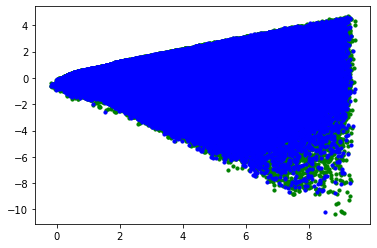

In [58]:
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train,
			color = "green", s = 10)
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test,
            color = "blue", s = 10)

### Now we get a classic "cone shaped" residual pattern. Something we can work with
### We are overestimating the distance for long rides

In [62]:
pred_reg = reg.predict(x_test)
diff= y_test-pred_reg

#### The QQ plot shows that the residuals assumption of normality is not met. We have to try to find a way to get a better prediciton for longer rides

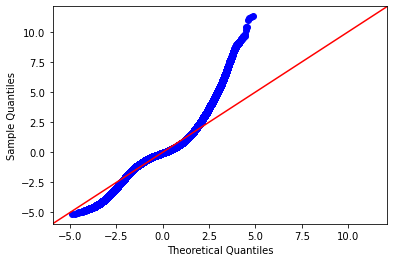

In [63]:
sm.qqplot(diff,fit=True,line='45')
plt.show()

### Lets try a y^2 transformation

In [104]:
y_transform =y_train**2

In [128]:
reg.fit(x_train, y_transform)

LinearRegression()

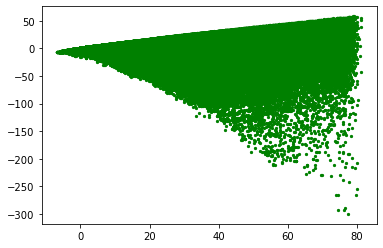

In [129]:
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_transform,
			color = "green", s = 5)

In [100]:
results = sm.OLS(y_transform,x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Dist   R-squared (uncentered):                   0.710
Model:                            OLS   Adj. R-squared (uncentered):              0.710
Method:                 Least Squares   F-statistic:                          5.537e+05
Date:                Sun, 26 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:22:50   Log-Likelihood:                     -6.7838e+06
No. Observations:             1811507   AIC:                                  1.357e+07
Df Residuals:                 1811499   BIC:                                  1.357e+07
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
weekend_weekday         -1.4305      0.015    -93.207      0.000      -1.461      -1.400
ride_length_seconds      0.0177   1.17e-05   1515.260      0.000       0.018       0.018
with_friend             -3.0479      0.046    -65.605      0.000      -3.139      -2.957
member_casual_member     1.6268      0.016     99.887      0.000       1.595       1.659
ride_type_medium        -7.6017      0.016   -462.481      0.000      -7.634      -7.569
ride_type_short         -5.2003      0.021   -243.063      0.000      -5.242      -5.158
time_of_day_morning      1.1317      0.020     55.836      0.000       1.092       1.171
time_of_day_night       -0.3085      0.017    -18.000      0.000      -0.342      -0.275
==============================================================================
Omnibus:                  1675296.580   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        179880973.637
Skew:                           4.114   Prob(JB):                         0.00
Kurtosis:                      51.120   Cond. No.                     6.45e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Try to square the ride length

In [114]:
x_train_sq = x_train
x_train_sq["seconds_sq"] = x_train_sq.ride_length_seconds**2
x_train_sq = x_train_sq.drop('ride_length_seconds',axis = 1)

In [115]:
results = sm.OLS(y_transform,x_train_sq).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Dist   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                          5.750e+05
Date:                Sun, 26 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:47:09   Log-Likelihood:                     -6.7595e+06
No. Observations:             1811507   AIC:                                  1.352e+07
Df Residuals:                 1811499   BIC:                                  1.352e+07
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
weekend_weekday         -0.6368      0.015    -42.665      0.000      -0.666      -0.608
with_friend             -2.5540      0.046    -55.740      0.000      -2.644      -2.464
member_casual_member     2.6432      0.016    167.018      0.000       2.612       2.674
ride_type_medium        -0.5778      0.017    -34.026      0.000      -0.611      -0.545
ride_type_short         -2.3176      0.022   -106.408      0.000      -2.360      -2.275
time_of_day_morning      1.9941      0.020    100.448      0.000       1.955       2.033
time_of_day_night        0.7177      0.017     43.049      0.000       0.685       0.750
seconds_sq            7.997e-06   5.15e-09   1551.793      0.000    7.99e-06    8.01e-06
==============================================================================
Omnibus:                  1389751.894   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        111440499.857
Skew:                           3.086   Prob(JB):                         0.00
Kurtosis:                      40.925   Cond. No.                     1.15e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
reg.fit(x_train_sq, y_transform)

LinearRegression()

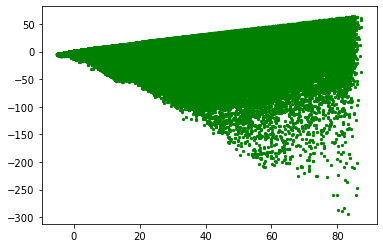

In [126]:
plt.scatter(reg.predict(x_train_sq), reg.predict(x_train_sq) - y_transform,
			color = "green", s = 5)

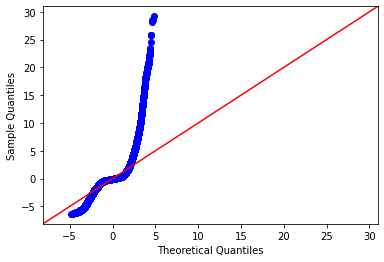

In [123]:
pred_reg = reg.predict(x_train_sq)
diff= y_transform-pred_reg
sm.qqplot(diff,fit=True,line='45')
plt.show()

### Transforming the dependent variable didnt improve the variables, neither did squaring the ride length. Regression is likely not a good way to model the data, we will try to use other models instead. We need a way to model the longer ride lengths differently from the shorter ride lenghts. A tree-based model that can seperate these might be a good model to use